## Investment Assignment

### Name: Smita Gopal Savant

# Business Objective

#### Spark Funds has two minor constraints for investments:
1. It wants to invest between 5 to 15 million USD per round of investment.
2. It wants to invest only in English-speaking countries because of the ease of communication with the companies it would invest in

In [135]:
#Importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import chardet
#%matplotlib.inline

In [136]:
with open("companies.csv",'rb') as rawdata:
    result = chardet.detect(rawdata.read(10000))

companies_encoding = result['encoding']
print(result)

{'encoding': 'utf-8', 'confidence': 0.7525, 'language': ''}


In [137]:
with open("rounds2.csv",'rb') as rawdata:
    result = chardet.detect(rawdata.read(10000))
    
rounds2_encoding = result['encoding']
print(result)

{'encoding': 'ISO-8859-1', 'confidence': 0.73, 'language': ''}


### Companies Dataframe

In [138]:
#Reading companies data
companies = pd.read_csv("companies.csv",encoding='ISO-8859-1')

In [139]:
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [140]:
#Checking companies dataframe info
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   permalink      66368 non-null  object
 1   name           66367 non-null  object
 2   homepage_url   61310 non-null  object
 3   category_list  63220 non-null  object
 4   status         66368 non-null  object
 5   country_code   59410 non-null  object
 6   state_code     57821 non-null  object
 7   region         58338 non-null  object
 8   city           58340 non-null  object
 9   founded_at     51147 non-null  object
dtypes: object(10)
memory usage: 5.1+ MB


In [141]:
companies.describe()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
count,66368,66367,61310,63220,66368,59410,57821,58338,58340,51147
unique,66368,66099,61191,27296,4,137,311,1092,5111,3978
top,/Organization/Thoughtswift-Medical-Assessments,Roost,http://www.askforoffer.com,Software,operating,USA,CA,SF Bay Area,San Francisco,01-01-2012
freq,1,4,5,3995,53034,37601,12900,8804,3526,2730


In [142]:
companies.permalink = companies.permalink.str.encode('ISO-8859-1').str.decode('ascii','ignore')

In [143]:
companies.permalink = companies.permalink.str.lower()

In [144]:
companies.permalink.describe()

count                 66368
unique                66368
top       /organization/aol
freq                      1
Name: permalink, dtype: object

In [145]:
companies.shape

(66368, 10)

In [146]:
#Checking null or NaN in companies dataframe
companies.isnull().sum()

permalink            0
name                 1
homepage_url      5058
category_list     3148
status               0
country_code      6958
state_code        8547
region            8030
city              8028
founded_at       15221
dtype: int64

### rounds2 Dataframe

In [147]:
#Reading rounds2 data
rounds2 = pd.read_csv("rounds2.csv",encoding='ISO-8859-1')

In [148]:
rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [149]:
#Checking rounds2 dataframe info
rounds2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114949 entries, 0 to 114948
Data columns (total 6 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   company_permalink        114949 non-null  object 
 1   funding_round_permalink  114949 non-null  object 
 2   funding_round_type       114949 non-null  object 
 3   funding_round_code       31140 non-null   object 
 4   funded_at                114949 non-null  object 
 5   raised_amount_usd        94959 non-null   float64
dtypes: float64(1), object(5)
memory usage: 5.3+ MB


In [150]:
rounds2.shape

(114949, 6)

In [151]:
#Checking null or NaN in rounds2 dataframe
rounds2.isnull().sum()

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd          19990
dtype: int64

In [152]:
rounds2.company_permalink.value_counts()

/ORGANIZATION/SOLARFLARE               10
/ORGANIZATION/QUELLAN                   9
/ORGANIZATION/ENDOGASTRIC-SOLUTIONS     9
/ORGANIZATION/EXAGEN-DIAGNOSTICS        9
/organization/exagen-diagnostics        9
                                       ..
/ORGANIZATION/CARMENTA-BIOSCIENCE       1
/ORGANIZATION/PUBLIC-MEDIA-WORKS        1
/ORGANIZATION/RESULTS-PHYSIOTHERAPY     1
/organization/thefamily                 1
/ORGANIZATION/HELLHOUSE-MEDIA           1
Name: company_permalink, Length: 90247, dtype: int64

In [153]:
rounds2.company_permalink.describe()

count                       114949
unique                       90247
top       /ORGANIZATION/SOLARFLARE
freq                            10
Name: company_permalink, dtype: object

In [154]:
rounds2.company_permalink = rounds2.company_permalink.str.encode('ISO-8859-1').str.decode('ascii','ignore')

In [155]:
rounds2.company_permalink = rounds2.company_permalink.str.lower()

In [156]:
rounds2.company_permalink.describe()

count                       114949
unique                       66368
top       /organization/solarflare
freq                            19
Name: company_permalink, dtype: object

In [157]:
rounds2.company_permalink.value_counts()

/organization/solarflare               19
/organization/quellan                  18
/organization/semprius                 18
/organization/exagen-diagnostics       18
/organization/endogastric-solutions    17
                                       ..
/organization/eyecyte                   1
/organization/viadedo                   1
/organization/aldeyra-therapeutics      1
/organization/work-movement             1
/organization/squeegy                   1
Name: company_permalink, Length: 66368, dtype: int64

In [158]:
#Set index for companies and rounds2
#companies.set_index('permalink',inplace=True)
#rounds2.set_index('company_permalink',inplace=True)

In [159]:
# How many unique companies are present in rounds2?
len(rounds2.company_permalink.unique())

66368

In [160]:
# How many unique companies are present in the companies file?
len(companies.permalink.unique())

66368

In [161]:
### Are there any companies in the rounds2 file which are not present in companies ? 
unique_in_rounds2 = pd.DataFrame(rounds2.company_permalink.unique())
unique_in_rounds2

,0
0,/organization/-fame
1,/organization/-qounter
2,/organization/-the-one-of-them-inc-
3,/organization/0-6-com
4,/organization/004-technologies
...,...
66363,/organization/zznode-science-and-technology-co...
66364,/organization/zzzzapp-com
66365,/organization/eron
66366,/organization/asys-2


In [162]:
unique_in_companies = pd.DataFrame(companies.permalink.unique())
unique_in_companies

,0
0,/organization/-fame
1,/organization/-qounter
2,/organization/-the-one-of-them-inc-
3,/organization/0-6-com
4,/organization/004-technologies
...,...
66363,/organization/zznode-science-and-technology-co...
66364,/organization/zzzzapp-com
66365,/organization/eron
66366,/organization/asys-2


In [163]:
unique_in_rounds2.equals(unique_in_companies)

True

In [164]:
difference_companies = set(unique_in_rounds2).difference(set(unique_in_companies))
list_c = list(difference_companies)
print(list_c)

[]


#### Merge the two data frames so that all variables (columns) in the companies frame are added to the rounds2 data frame. Name the merged frame master_frame. 

In [165]:
master_frame = pd.merge(companies,rounds2,how='left', right_on= 'company_permalink', left_on= 'permalink')

In [166]:
master_frame.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [167]:
master_frame.shape[0]

114949

In [168]:
master_frame.isnull().sum()

permalink                      0
name                           1
homepage_url                6134
category_list               3410
status                         0
country_code                8678
state_code                 10946
region                     10167
city                       10164
founded_at                 20521
company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd          19990
dtype: int64

In [169]:
#Dropping null values from columns - raised_amount_usd,category_list,country_code                

master_frame = master_frame[~(master_frame['raised_amount_usd'].isnull() | master_frame['category_list'].isnull() |
                             master_frame['country_code'].isnull())]

In [170]:
master_frame.isnull().sum()

permalink                      0
name                           1
homepage_url                3251
category_list                  0
status                         0
country_code                   0
state_code                  1731
region                      1184
city                        1181
founded_at                 13369
company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         61753
funded_at                      0
raised_amount_usd              0
dtype: int64

In [171]:
#Dropping null values from columns - funding_round_code,homepage_url,state_code,region,city and founded_at                              

master_frame = master_frame.drop(['funding_round_code','homepage_url','state_code','region','city','founded_at'],axis =1)

In [172]:
master_frame.isnull().sum()

permalink                  0
name                       1
category_list              0
status                     0
country_code               0
company_permalink          0
funding_round_permalink    0
funding_round_type         0
funded_at                  0
raised_amount_usd          0
dtype: int64

In [173]:
master_frame.shape

(88529, 10)

In [174]:
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88529 entries, 0 to 114947
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   permalink                88529 non-null  object 
 1   name                     88528 non-null  object 
 2   category_list            88529 non-null  object 
 3   status                   88529 non-null  object 
 4   country_code             88529 non-null  object 
 5   company_permalink        88529 non-null  object 
 6   funding_round_permalink  88529 non-null  object 
 7   funding_round_type       88529 non-null  object 
 8   funded_at                88529 non-null  object 
 9   raised_amount_usd        88529 non-null  float64
dtypes: float64(1), object(9)
memory usage: 7.4+ MB


In [175]:
master_frame.funding_round_type.describe()             

count       88529
unique         14
top       venture
freq        47809
Name: funding_round_type, dtype: object

In [176]:
master_frame.funding_round_type.value_counts()    

venture                  47809
seed                     21095
debt_financing            6506
angel                     4400
grant                     1939
private_equity            1820
undisclosed               1345
convertible_note          1320
equity_crowdfunding       1128
post_ipo_equity            598
product_crowdfunding       330
post_ipo_debt              151
non_equity_assistance       60
secondary_market            28
Name: funding_round_type, dtype: int64

### Spark Funds wants to choose one of these four investment types [seed,angel,venture and private equity] for each potential investment they will make.

In [177]:
master_frame = master_frame[(master_frame.funding_round_type == 'seed') |
                            (master_frame.funding_round_type == 'angel') |
                            (master_frame.funding_round_type == 'venture') |
                            (master_frame.funding_round_type == 'private_equity')]

In [178]:
master_frame.shape

(75124, 10)

In [179]:
master_frame.head()

,permalink,name,category_list,status,country_code,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd
0,/organization/-fame,#fame,Media,operating,IND,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0
2,/organization/-qounter,:Qounter,Application Platforms|Real Time|Social Network...,operating,USA,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,01-03-2014,700000.0
4,/organization/0-6-com,0-6.com,Curated Web,operating,CHN,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.0
7,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,Biotechnology,operating,CAN,/organization/0ndine-biomedical-inc,/funding-round/2b9d3ac293d5cdccbecff5c8cb0f327d,seed,11-09-2009,43360.0
8,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,Biotechnology,operating,CAN,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,21-12-2009,719491.0


In [180]:
#Converting dollars to million dollars
master_frame.raised_amount_usd = master_frame.raised_amount_usd/1000000

In [181]:
master_frame.head(20)

,permalink,name,category_list,status,country_code,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd
0,/organization/-fame,#fame,Media,operating,IND,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10.000000
2,/organization/-qounter,:Qounter,Application Platforms|Real Time|Social Network...,operating,USA,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,01-03-2014,0.700000
4,/organization/0-6-com,0-6.com,Curated Web,operating,CHN,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2.000000
7,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,Biotechnology,operating,CAN,/organization/0ndine-biomedical-inc,/funding-round/2b9d3ac293d5cdccbecff5c8cb0f327d,seed,11-09-2009,0.043360
8,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,Biotechnology,operating,CAN,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,21-12-2009,0.719491
9,/organization/0xdata,H2O.ai,Analytics,operating,USA,/organization/0xdata,/funding-round/383a9bd2c04f7038bb543ccef5ba3eae,seed,22-05-2013,3.000000
10,/organization/0xdata,H2O.ai,Analytics,operating,USA,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20.000000
11,/organization/0xdata,H2O.ai,Analytics,operating,USA,/organization/0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1.700000
12,/organization/0xdata,H2O.ai,Analytics,operating,USA,/organization/0xdata,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,19-07-2014,8.900000
13,/organization/1,One Inc.,Mobile,operating,USA,/organization/1,/funding-round/03b975068632eba5bfdb937ec8c07a68,seed,05-02-2014,0.150000


In [182]:
#Representative funding amount of venture type
round(master_frame.groupby('funding_round_type').raised_amount_usd.mean(),2)

funding_round_type
angel              0.97
private_equity    73.94
seed               0.75
venture           11.72
Name: raised_amount_usd, dtype: float64

#### Considering that Spark Funds wants to invest between 5 to 15 million USD per  investment round, which investment type is the most suitable for them?
As per spark funds investment, "venture" is more suitable for them to invest.

In [183]:
#Keeping only those rows with funding_round_type = venture

master_frame_venture = master_frame[(master_frame.funding_round_type == 'venture')]

In [184]:
master_frame_venture.head()

,permalink,name,category_list,status,country_code,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd
0,/organization/-fame,#fame,Media,operating,IND,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10.000000
4,/organization/0-6-com,0-6.com,Curated Web,operating,CHN,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2.000000
8,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,Biotechnology,operating,CAN,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,21-12-2009,0.719491
10,/organization/0xdata,H2O.ai,Analytics,operating,USA,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20.000000
11,/organization/0xdata,H2O.ai,Analytics,operating,USA,/organization/0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1.700000


In [185]:
master_frame_venture.shape

(47809, 10)

In [186]:
master_frame_venture.isnull().sum()

permalink                  0
name                       0
category_list              0
status                     0
country_code               0
company_permalink          0
funding_round_permalink    0
funding_round_type         0
funded_at                  0
raised_amount_usd          0
dtype: int64

# Country Analysis

In [187]:
top9 = master_frame_venture.pivot_table(values='raised_amount_usd',index='country_code',aggfunc='sum')

In [188]:
top9 = top9.sort_values(by ='raised_amount_usd', ascending= False)[:9]

In [189]:
top9

,raised_amount_usd
country_code,
USA,420068.029342
CHN,39338.918773
GBR,20072.813004
IND,14261.508718
CAN,9482.217668
FRA,7226.851352
ISR,6854.350477
DEU,6306.921981
JPN,3167.647127


### As per analysis, top 3 english speaking countries are - USA, GBR and IND

In [190]:
#Keeping only those countries in which spark funds is interested i.e. top 3 english speaking countries

master_frame_venture = master_frame_venture[(master_frame_venture.country_code == 'USA')|
                            (master_frame_venture.country_code == 'GBR')|
                            (master_frame_venture.country_code == 'IND')]

In [191]:
master_frame_venture.shape

(38803, 10)

In [192]:
master_frame_venture.head(20)

,permalink,name,category_list,status,country_code,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd
0,/organization/-fame,#fame,Media,operating,IND,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10.000000
10,/organization/0xdata,H2O.ai,Analytics,operating,USA,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20.000000
11,/organization/0xdata,H2O.ai,Analytics,operating,USA,/organization/0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1.700000
12,/organization/0xdata,H2O.ai,Analytics,operating,USA,/organization/0xdata,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,19-07-2014,8.900000
22,/organization/1-mainstream,1 Mainstream,Apps|Cable|Distribution|Software,acquired,USA,/organization/1-mainstream,/funding-round/b952cbaf401f310927430c97b68162ea,venture,17-03-2015,5.000000
28,/organization/10-minutes-with,10 Minutes With,Education,operating,GBR,/organization/10-minutes-with,/funding-round/0faccbbcc5818dc5326469f13f5a8ac8,venture,09-10-2014,4.000000
34,/organization/1000memories,1000memories,Curated Web,acquired,USA,/organization/1000memories,/funding-round/502bd0e50c27616995e4bdad24605ef8,venture,16-02-2011,2.520000
38,/organization/1000museums-com,1000museums.com,Curated Web,operating,USA,/organization/1000museums-com,/funding-round/13be128d655076a025221d7fddc90d68,venture,14-10-2009,0.265940
39,/organization/1000museums-com,1000museums.com,Curated Web,operating,USA,/organization/1000museums-com,/funding-round/6aeb32ab3fc05db2b606d7a2466e8c09,venture,15-01-2014,2.906832
41,/organization/1000museums-com,1000museums.com,Curated Web,operating,USA,/organization/1000museums-com,/funding-round/89317984885b44f02e4befb9dc2e588c,venture,01-08-2014,1.500000


# Sector Analysis

In [193]:
master_frame_venture.category_list = master_frame_venture.category_list.apply(lambda x: x.split('|')[0])

In [194]:
master_frame_venture.category_list

0                 Media
10            Analytics
11            Analytics
12            Analytics
22                 Apps
              ...      
114920    Biotechnology
114922    Biotechnology
114923    Biotechnology
114934       E-Commerce
114936    Biotechnology
Name: category_list, Length: 38803, dtype: object

In [195]:
master_frame_venture.category_list.value_counts()

Biotechnology           5875
Software                3345
Advertising             1847
Health Care             1596
Enterprise Software     1560
                        ... 
Ticketing                  1
Mechanical Solutions       1
Specialty Chemicals        1
IaaS                       1
Staffing Firms             1
Name: category_list, Length: 563, dtype: int64

In [196]:
master_frame_venture.head(10)

,permalink,name,category_list,status,country_code,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd
0,/organization/-fame,#fame,Media,operating,IND,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10.000000
10,/organization/0xdata,H2O.ai,Analytics,operating,USA,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20.000000
11,/organization/0xdata,H2O.ai,Analytics,operating,USA,/organization/0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1.700000
12,/organization/0xdata,H2O.ai,Analytics,operating,USA,/organization/0xdata,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,19-07-2014,8.900000
22,/organization/1-mainstream,1 Mainstream,Apps,acquired,USA,/organization/1-mainstream,/funding-round/b952cbaf401f310927430c97b68162ea,venture,17-03-2015,5.000000
28,/organization/10-minutes-with,10 Minutes With,Education,operating,GBR,/organization/10-minutes-with,/funding-round/0faccbbcc5818dc5326469f13f5a8ac8,venture,09-10-2014,4.000000
34,/organization/1000memories,1000memories,Curated Web,acquired,USA,/organization/1000memories,/funding-round/502bd0e50c27616995e4bdad24605ef8,venture,16-02-2011,2.520000
38,/organization/1000museums-com,1000museums.com,Curated Web,operating,USA,/organization/1000museums-com,/funding-round/13be128d655076a025221d7fddc90d68,venture,14-10-2009,0.265940
39,/organization/1000museums-com,1000museums.com,Curated Web,operating,USA,/organization/1000museums-com,/funding-round/6aeb32ab3fc05db2b606d7a2466e8c09,venture,15-01-2014,2.906832
41,/organization/1000museums-com,1000museums.com,Curated Web,operating,USA,/organization/1000museums-com,/funding-round/89317984885b44f02e4befb9dc2e588c,venture,01-08-2014,1.500000


### Mapping Dataframe

In [197]:
#Reading mapping.csv

mapping = pd.read_csv("mapping.csv")

In [198]:
mapping.head(20)

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1
5,Active Lifestyle,0,0,0,0,1,0,0,0,0
6,Ad Targeting,0,0,0,0,0,0,0,0,1
7,Advanced Materials,0,0,0,0,0,1,0,0,0
8,Adventure Travel,1,0,0,0,0,0,0,0,0
9,Advertising,0,0,0,0,0,0,0,0,1


In [199]:
mapping.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 688 entries, 0 to 687
Data columns (total 10 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   category_list                            687 non-null    object
 1   Automotive & Sports                      688 non-null    int64 
 2   Blanks                                   688 non-null    int64 
 3   Cleantech / Semiconductors               688 non-null    int64 
 4   Entertainment                            688 non-null    int64 
 5   Health                                   688 non-null    int64 
 6   Manufacturing                            688 non-null    int64 
 7   News, Search and Messaging               688 non-null    int64 
 8   Others                                   688 non-null    int64 
 9   Social, Finance, Analytics, Advertising  688 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 53.9+ KB


In [200]:
mapping.category_list = mapping.category_list.replace({"0":"na","2.na":"2.0"}, regex=True)

In [201]:
mapping.head(20)

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1
5,Active Lifestyle,0,0,0,0,1,0,0,0,0
6,Ad Targeting,0,0,0,0,0,0,0,0,1
7,Advanced Materials,0,0,0,0,0,1,0,0,0
8,Adventure Travel,1,0,0,0,0,0,0,0,0
9,Advertising,0,0,0,0,0,0,0,0,1


In [202]:
mapping = pd.melt(mapping,id_vars=['category_list'],value_vars=['Manufacturing','Automotive & Sports',
                                                                'Entertainment',
                                                               'Social, Finance, Analytics, Advertising',
                                                               'Health','Cleantech / Semiconductors',
                                                               'News, Search and Messaging',
                                                               'Others'])

In [203]:
mapping = mapping[~(mapping.value == 0)]

In [204]:
mapping.shape

(687, 3)

In [205]:
mapping.head(20)

,category_list,variable,value
1,3D,Manufacturing,1
2,3D Printing,Manufacturing,1
3,3D Technology,Manufacturing,1
7,Advanced Materials,Manufacturing,1
15,Agriculture,Manufacturing,1
34,Architecture,Manufacturing,1
55,Batteries,Manufacturing,1
78,Building Products,Manufacturing,1
104,Civil Engineers,Manufacturing,1
127,Communications Hardware,Manufacturing,1


In [206]:
mapping = mapping.rename(columns = {"variable":"main_sector"})

In [207]:
mapping.head(20)

,category_list,main_sector,value
1,3D,Manufacturing,1
2,3D Printing,Manufacturing,1
3,3D Technology,Manufacturing,1
7,Advanced Materials,Manufacturing,1
15,Agriculture,Manufacturing,1
34,Architecture,Manufacturing,1
55,Batteries,Manufacturing,1
78,Building Products,Manufacturing,1
104,Civil Engineers,Manufacturing,1
127,Communications Hardware,Manufacturing,1


In [208]:
master_frame_venture = master_frame_venture.merge(mapping,how = 'left', on='category_list')

In [209]:
master_frame_venture.head()

,permalink,name,category_list,status,country_code,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,main_sector,value
0,/organization/-fame,#fame,Media,operating,IND,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10.0,Entertainment,1.0
1,/organization/0xdata,H2O.ai,Analytics,operating,USA,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20.0,"Social, Finance, Analytics, Advertising",1.0
2,/organization/0xdata,H2O.ai,Analytics,operating,USA,/organization/0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1.7,"Social, Finance, Analytics, Advertising",1.0
3,/organization/0xdata,H2O.ai,Analytics,operating,USA,/organization/0xdata,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,19-07-2014,8.9,"Social, Finance, Analytics, Advertising",1.0
4,/organization/1-mainstream,1 Mainstream,Apps,acquired,USA,/organization/1-mainstream,/funding-round/b952cbaf401f310927430c97b68162ea,venture,17-03-2015,5.0,"News, Search and Messaging",1.0


In [210]:
master_frame_venture.main_sector.isnull().sum()

165

In [211]:
master_frame_venture = master_frame_venture[~(master_frame_venture.main_sector.isnull())]

In [212]:
master_frame_venture.main_sector.isnull().sum()

0

In [213]:
master_frame_venture.main_sector.value_counts()

Others                                     9110
Cleantech / Semiconductors                 8348
Social, Finance, Analytics, Advertising    7814
News, Search and Messaging                 4721
Health                                     3429
Manufacturing                              2630
Entertainment                              2006
Automotive & Sports                         580
Name: main_sector, dtype: int64

# Sector Analysis 2

In [214]:
D1 = master_frame_venture[(master_frame_venture.country_code == 'USA') &
                  (master_frame_venture.raised_amount_usd >= 5) &
                  (master_frame_venture.raised_amount_usd <= 15)]

In [215]:
D1.head()

,permalink,name,category_list,status,country_code,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,main_sector,value
3,/organization/0xdata,H2O.ai,Analytics,operating,USA,/organization/0xdata,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,19-07-2014,8.900000,"Social, Finance, Analytics, Advertising",1.0
4,/organization/1-mainstream,1 Mainstream,Apps,acquired,USA,/organization/1-mainstream,/funding-round/b952cbaf401f310927430c97b68162ea,venture,17-03-2015,5.000000,"News, Search and Messaging",1.0
17,/organization/128-technology,128 Technology,Service Providers,operating,USA,/organization/128-technology,/funding-round/fb6216a30cb566ede89e0bee0623a634,venture,16-12-2014,11.999347,Others,1.0
20,/organization/1366-technologies,1366 Technologies,Manufacturing,operating,USA,/organization/1366-technologies,/funding-round/424129ce1235cfab2655ee81305f7c2b,venture,15-10-2013,15.000000,Manufacturing,1.0
21,/organization/1366-technologies,1366 Technologies,Manufacturing,operating,USA,/organization/1366-technologies,/funding-round/6d3f3797371956ece035b8478c1441b2,venture,09-04-2015,5.000000,Manufacturing,1.0


In [216]:
D1_grouped = D1[['raised_amount_usd','main_sector']].groupby('main_sector').agg(['sum','count'])

In [217]:
D1_grouped.head()

raised_amount_usd      
                                         sum count
main_sector                                       
Automotive & Sports              1454.104361   167
Cleantech / Semiconductors      21206.628192  2300
Entertainment                    5099.197982   591
Health                           8211.859357   909
Manufacturing                    7258.553378   799

In [218]:
D1 = D1.merge(D1_grouped,how='left', on = 'main_sector')

D:\Anaconda3\lib\site-packages\pandas\core\reshape\merge.py:648: UserWarning: merging between different levels can give an unintended result (1 levels on the left,2 on the right)
  warnings.warn(msg, UserWarning)


In [219]:
D1.head(20)

,permalink,name,category_list,status,country_code,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,main_sector,value,"(raised_amount_usd, sum)","(raised_amount_usd, count)"
0,/organization/0xdata,H2O.ai,Analytics,operating,USA,/organization/0xdata,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,19-07-2014,8.900000,"Social, Finance, Analytics, Advertising",1.0,23807.376964,2714
1,/organization/1-mainstream,1 Mainstream,Apps,acquired,USA,/organization/1-mainstream,/funding-round/b952cbaf401f310927430c97b68162ea,venture,17-03-2015,5.000000,"News, Search and Messaging",1.0,13959.567428,1582
2,/organization/128-technology,128 Technology,Service Providers,operating,USA,/organization/128-technology,/funding-round/fb6216a30cb566ede89e0bee0623a634,venture,16-12-2014,11.999347,Others,1.0,26321.007002,2950
3,/organization/1366-technologies,1366 Technologies,Manufacturing,operating,USA,/organization/1366-technologies,/funding-round/424129ce1235cfab2655ee81305f7c2b,venture,15-10-2013,15.000000,Manufacturing,1.0,7258.553378,799
4,/organization/1366-technologies,1366 Technologies,Manufacturing,operating,USA,/organization/1366-technologies,/funding-round/6d3f3797371956ece035b8478c1441b2,venture,09-04-2015,5.000000,Manufacturing,1.0,7258.553378,799
5,/organization/1366-technologies,1366 Technologies,Manufacturing,operating,USA,/organization/1366-technologies,/funding-round/786f61aa9866f4471151285f5c56be36,venture,03-02-2010,5.150000,Manufacturing,1.0,7258.553378,799
6,/organization/1366-technologies,1366 Technologies,Manufacturing,operating,USA,/organization/1366-technologies,/funding-round/82ace97530965cd2be8f262836b43ff5,venture,27-03-2008,12.400000,Manufacturing,1.0,7258.553378,799
7,/organization/1366-technologies,1366 Technologies,Manufacturing,operating,USA,/organization/1366-technologies,/funding-round/ab99fc5a53717b1b53fd6aa5687c5fa9,venture,16-12-2010,6.000000,Manufacturing,1.0,7258.553378,799
8,/organization/170-systems,170 Systems,Software,acquired,USA,/organization/170-systems,/funding-round/b84bb882ca873f5fb96535671981196d,venture,16-04-2002,14.000000,Others,1.0,26321.007002,2950
9,/organization/17zuoye,17zuoye,Education,operating,USA,/organization/17zuoye,/funding-round/69690484f51e15bc27ff52bfe472cd96,venture,01-01-2011,5.000000,Others,1.0,26321.007002,2950


In [220]:
D2 = master_frame_venture[(master_frame_venture.country_code == 'GBR') &
                  (master_frame_venture.raised_amount_usd >= 5) &
                  (master_frame_venture.raised_amount_usd <= 15)]

In [221]:
D2_grouped = D2[['raised_amount_usd','main_sector']].groupby('main_sector').agg(['sum','count'])
D2 = D2.merge(D2_grouped,how='left', on = 'main_sector')
D2.head(20)

D:\Anaconda3\lib\site-packages\pandas\core\reshape\merge.py:648: UserWarning: merging between different levels can give an unintended result (1 levels on the left,2 on the right)
  warnings.warn(msg, UserWarning)


,permalink,name,category_list,status,country_code,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,main_sector,value,"(raised_amount_usd, sum)","(raised_amount_usd, count)"
0,/organization/365scores,365Scores,Android,operating,GBR,/organization/365scores,/funding-round/48212f931f542fdef78810bc87aef086,venture,29-09-2014,5.500000,"Social, Finance, Analytics, Advertising",1.0,1089.404014,133
1,/organization/7digital,7digital,Content Creators,acquired,GBR,/organization/7digital,/funding-round/b5ad7ed7baddd3974bd51403f17dd88f,venture,01-01-2008,8.468328,Entertainment,1.0,482.784687,56
2,/organization/7digital,7digital,Content Creators,acquired,GBR,/organization/7digital,/funding-round/eafacfcceb1fbc4fd605f641b603313e,venture,19-10-2012,10.000000,Entertainment,1.0,482.784687,56
3,/organization/90min,90min,Media,operating,GBR,/organization/90min,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,06-10-2015,15.000000,Entertainment,1.0,482.784687,56
4,/organization/90min,90min,Media,operating,GBR,/organization/90min,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,07-05-2013,5.800000,Entertainment,1.0,482.784687,56
5,/organization/abcodia,Abcodia,Biotechnology,operating,GBR,/organization/abcodia,/funding-round/3d20c23d203134ed86c0d1b2bec288b2,venture,18-05-2015,8.259067,Cleantech / Semiconductors,1.0,1150.139665,128
6,/organization/acacia-pharma,Acacia Pharma,Biotechnology,operating,GBR,/organization/acacia-pharma,/funding-round/26eac8a3875e1a7bc68d36ceb7a71b05,venture,31-03-2011,10.000000,Cleantech / Semiconductors,1.0,1150.139665,128
7,/organization/acal-energy,ACAL Energy,Clean Technology,operating,GBR,/organization/acal-energy,/funding-round/16817efd4bbef10f63cccdf158f47a41,venture,15-06-2011,9.910333,Cleantech / Semiconductors,1.0,1150.139665,128
8,/organization/acal-enterprise-solutions,Acal Enterprise Solutions,Information Technology,operating,GBR,/organization/acal-enterprise-solutions,/funding-round/0f9a693d9686330c5c2724215e0048e2,venture,03-06-2014,10.720178,"Social, Finance, Analytics, Advertising",1.0,1089.404014,133
9,/organization/accent-media-ltd,Accent Media Limited,Domains,operating,GBR,/organization/accent-media-ltd,/funding-round/9dc643fa45031a46ffcfaa061d94e3e3,venture,01-07-2013,8.300000,"News, Search and Messaging",1.0,615.746235,73


In [222]:
D3 = master_frame_venture[(master_frame_venture.country_code == 'IND') &
                  (master_frame_venture.raised_amount_usd >= 5) &
                  (master_frame_venture.raised_amount_usd <= 15)]

In [223]:
D3_grouped = D3[['raised_amount_usd','main_sector']].groupby('main_sector').agg(['sum','count'])
D3 = D3.merge(D3_grouped,how='left', on = 'main_sector')
D3.head(10)

D:\Anaconda3\lib\site-packages\pandas\core\reshape\merge.py:648: UserWarning: merging between different levels can give an unintended result (1 levels on the left,2 on the right)
  warnings.warn(msg, UserWarning)


,permalink,name,category_list,status,country_code,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,main_sector,value,"(raised_amount_usd, sum)","(raised_amount_usd, count)"
0,/organization/-fame,#fame,Media,operating,IND,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10.000000,Entertainment,1.0,280.830000,33
1,/organization/21diamonds-india,21Diamonds,E-Commerce,operating,IND,/organization/21diamonds-india,/funding-round/6de7ffef8091ba9f33821f4b861f434a,venture,15-11-2012,6.369507,Others,1.0,1013.409507,110
2,/organization/a-little-world,A LITTLE WORLD,Finance,operating,IND,/organization/a-little-world,/funding-round/18d98f82ed392b1609975b81f3e8b3fb,venture,09-09-2008,6.410000,"Social, Finance, Analytics, Advertising",1.0,550.549550,60
3,/organization/adlabs-imagica,Adlabs Imagica,Entertainment,operating,IND,/organization/adlabs-imagica,/funding-round/508d3c83daaae9fda3ba6f9682c78f6c,venture,28-10-2014,8.180000,Entertainment,1.0,280.830000,33
4,/organization/agile,Agile,Finance,operating,IND,/organization/agile,/funding-round/cd3dd1c98ce9d0f632d8752163941674,venture,01-05-2011,5.740000,"Social, Finance, Analytics, Advertising",1.0,550.549550,60
5,/organization/akosha,Akosha,Consumer Internet,operating,IND,/organization/akosha,/funding-round/908a8813e2273a2bc604bf40a45c15ff,venture,01-07-2014,5.000000,"Social, Finance, Analytics, Advertising",1.0,550.549550,60
6,/organization/amagi-media-labs,Amagi Media Labs,Advertising,operating,IND,/organization/amagi-media-labs,/funding-round/f244a91cc714317f6fbbc80dcc1d5135,venture,17-06-2013,5.500000,"Social, Finance, Analytics, Advertising",1.0,550.549550,60
7,/organization/ameyo,Ameyo,Software,operating,IND,/organization/ameyo,/funding-round/81b50a403d5d2293715fe9b0ce4db5d3,venture,03-07-2015,5.000000,Others,1.0,1013.409507,110
8,/organization/ani-technologies,Ola,Automotive,operating,IND,/organization/ani-technologies,/funding-round/1e2b54335e2a41d8d7db25b7c11db399,venture,10-04-2012,5.000000,Automotive & Sports,1.0,136.900000,13
9,/organization/annapurna-microfinace,Annapurna Microfinace,Finance,operating,IND,/organization/annapurna-microfinace,/funding-round/3f03bc9fea4ae59b1ce8c86a0782107e,venture,26-03-2014,5.000000,"Social, Finance, Analytics, Advertising",1.0,550.549550,60


In [224]:
D1.raised_amount_usd.count()

12012

In [225]:
D2.raised_amount_usd.count()

619

In [226]:
D3.raised_amount_usd.count()

328

In [227]:
#Total number of investments count?
D1.raised_amount_usd.count() + D2.raised_amount_usd.count() + D3.raised_amount_usd.count()

12959

In [228]:
print(D1.raised_amount_usd.sum())
print(D2.raised_amount_usd.sum())
print(D3.raised_amount_usd.sum())

107318.29466400002
5365.2283
2949.5436019999997


In [229]:
#print(D1_grouped.sort_values(by='raised_amount_usd,sum'))
print(D1_grouped)

                                        raised_amount_usd      
                                                      sum count
main_sector                                                    
Automotive & Sports                           1454.104361   167
Cleantech / Semiconductors                   21206.628192  2300
Entertainment                                 5099.197982   591
Health                                        8211.859357   909
Manufacturing                                 7258.553378   799
News, Search and Messaging                   13959.567428  1582
Others                                       26321.007002  2950
Social, Finance, Analytics, Advertising      23807.376964  2714


In [230]:
print(D2_grouped)

                                        raised_amount_usd      
                                                      sum count
main_sector                                                    
Automotive & Sports                            167.051565    16
Cleantech / Semiconductors                    1150.139665   128
Entertainment                                  482.784687    56
Health                                         214.537510    24
Manufacturing                                  361.940335    42
News, Search and Messaging                     615.746235    73
Others                                        1283.624289   147
Social, Finance, Analytics, Advertising       1089.404014   133


In [231]:
print(D3_grouped)

                                        raised_amount_usd      
                                                      sum count
main_sector                                                    
Automotive & Sports                            136.900000    13
Cleantech / Semiconductors                     165.380000    20
Entertainment                                  280.830000    33
Health                                         167.740000    19
Manufacturing                                  200.900000    21
News, Search and Messaging                     433.834545    52
Others                                        1013.409507   110
Social, Finance, Analytics, Advertising        550.549550    60


In [232]:
#Total amount of investments?
print(D1.raised_amount_usd.sum())
print(D2.raised_amount_usd.sum())
print(D3.raised_amount_usd.sum())

107318.29466400002
5365.2283
2949.5436019999997


In [233]:
D1_company_others = D1[D1['main_sector'] == 'Others']

In [234]:
D1_company_others = D1_company_others.pivot_table(index='company_permalink',values='raised_amount_usd',aggfunc='sum')

In [235]:
D1_company_others = D1_company_others.sort_values(by='raised_amount_usd',ascending=False)
D1_company_others.head()

,raised_amount_usd
company_permalink,
/organization/virtustream,64.300000
/organization/capella,54.968051
/organization/airtight-networks,54.201907
/organization/decarta,52.100000
/organization/black-duck-software,51.000000


In [236]:
D1_company_sfaa = D1[D1['main_sector'] == 'Social, Finance, Analytics, Advertising']
D1_company_sfaa = D1_company_sfaa.pivot_table(index='company_permalink',values='raised_amount_usd',aggfunc='sum')
D1_company_sfaa = D1_company_sfaa.sort_values(by='raised_amount_usd',ascending=False)
D1_company_sfaa.head()

,raised_amount_usd
company_permalink,
/organization/shotspotter,67.933006
/organization/demandbase,63.000000
/organization/intacct,61.800000
/organization/netbase,60.600000
/organization/lotame,59.700000


In [237]:
D2_company_sfaa = D2[D2['main_sector'] == 'Social, Finance, Analytics, Advertising']
D2_company_sfaa = D2_company_sfaa.pivot_table(index='company_permalink',values='raised_amount_usd',aggfunc='sum')
D2_company_sfaa = D2_company_sfaa.sort_values(by='raised_amount_usd',ascending=False)
D2_company_sfaa.head()

,raised_amount_usd
company_permalink,
/organization/celltick-technologies,37.500000
/organization/mythings,34.000000
/organization/zopa,32.900000
/organization/imagini,28.550000
/organization/marketinvoice,25.553007


In [238]:
D2_company_others = D2[D2['main_sector'] == 'Others']
D2_company_others = D2_company_others.pivot_table(index='company_permalink',values='raised_amount_usd',aggfunc='sum')
D2_company_others = D2_company_others.sort_values(by='raised_amount_usd',ascending=False)
D2_company_others.head()

,raised_amount_usd
company_permalink,
/organization/electric-cloud,37.000000
/organization/sensage,36.250000
/organization/enigmatic,32.500000
/organization/silverrail-technologies,29.000000
/organization/opencloud,27.972766


In [239]:
D3_grouped

raised_amount_usd      
                                                      sum count
main_sector                                                    
Automotive & Sports                            136.900000    13
Cleantech / Semiconductors                     165.380000    20
Entertainment                                  280.830000    33
Health                                         167.740000    19
Manufacturing                                  200.900000    21
News, Search and Messaging                     433.834545    52
Others                                        1013.409507   110
Social, Finance, Analytics, Advertising        550.549550    60

In [240]:
D3_company_sfaa = D3[D3['main_sector'] == 'Social, Finance, Analytics, Advertising']
D3_company_sfaa = D3_company_sfaa.pivot_table(index='company_permalink',values='raised_amount_usd',aggfunc='sum')
D3_company_sfaa = D3_company_sfaa.sort_values(by='raised_amount_usd',ascending=False)
D3_company_sfaa.head()

,raised_amount_usd
company_permalink,
/organization/manthan-systems,50.70000
/organization/komli-media,28.00000
/organization/shopclues-com,25.00000
/organization/intarvo,21.90000
/organization/grameen-financial-services,21.55605


In [241]:
D3_company_others = D3[D3['main_sector'] == 'Others']
D3_company_others = D3_company_others.pivot_table(index='company_permalink',values='raised_amount_usd',aggfunc='sum')
D3_company_others = D3_company_others.sort_values(by='raised_amount_usd',ascending=False)
D3_company_others.head()

,raised_amount_usd
company_permalink,
/organization/firstcry-com,39.0
/organization/myntra,38.0
/organization/commonfloor,32.9
/organization/pepperfry-com,28.0
/organization/itzcash-card-ltd,25.0


# Plots

venture           47809
seed              21095
angel              4400
private_equity     1820
Name: funding_round_type, dtype: int64


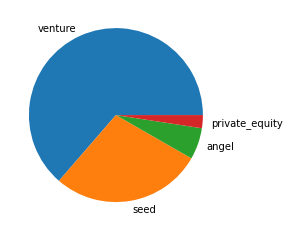

In [242]:
round_types = master_frame.funding_round_type.value_counts()
print(round_types)
plt.pie(round_types.values,labels=round_types.index)
plt.show()

#####  *Amount is in million dollars*

Seed: 0.7477936824840219
Angel: 0.9715738911363637
Private Equity: 73.93848627527474
Venture: 11.724222690204583


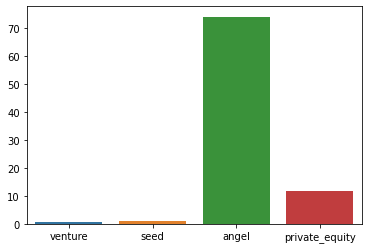

In [243]:
#Average funding amount for seed type
seed_avg = master_frame[master_frame['funding_round_type'] == 'seed'].raised_amount_usd.mean()
print(f"Seed: {seed_avg}")

#Average funding amount for angel type
angel_avg = master_frame[master_frame['funding_round_type'] == 'angel'].raised_amount_usd.mean()
print(f"Angel: {angel_avg}")

#Average funding amount for angel type
pe_avg = master_frame[master_frame['funding_round_type'] == 'private_equity'].raised_amount_usd.mean()
print(f"Private Equity: {pe_avg}")

#Average funding amount for angel type
venture_avg = master_frame[master_frame['funding_round_type'] == 'venture'].raised_amount_usd.mean()
print(f"Venture: {venture_avg}")

#Plot a barplot
sns.barplot(x=round_types.index,y=[seed_avg,angel_avg,pe_avg,venture_avg])
plt.show()



#### Plot for top english speaking countries

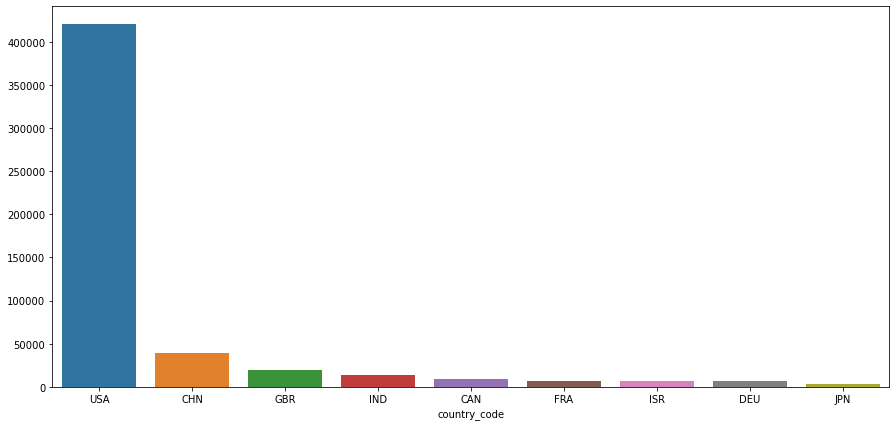

In [244]:
plt.figure(figsize=(15,7))
sns.barplot(x=top9.index,y=top9.values.ravel())
plt.show()

In [245]:
sectors = master_frame_venture.main_sector.value_counts()
print(sectors)

Others                                     9110
Cleantech / Semiconductors                 8348
Social, Finance, Analytics, Advertising    7814
News, Search and Messaging                 4721
Health                                     3429
Manufacturing                              2630
Entertainment                              2006
Automotive & Sports                         580
Name: main_sector, dtype: int64


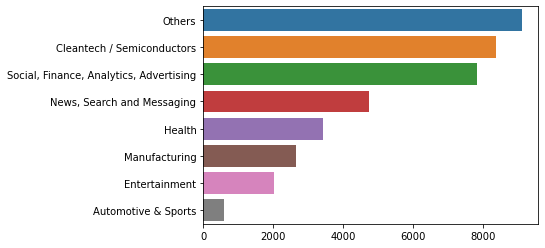

In [246]:
sns.barplot(x=sectors.values,y=sectors.index)
plt.show()

In [247]:
amount_per_type = master_frame.groupby('funding_round_type').agg({'raised_amount_usd':'sum'})

In [248]:
print(amount_per_type)  #figures are in million dollars

                    raised_amount_usd
funding_round_type                   
angel                     4274.925121
private_equity          134568.045021
seed                     15774.707732
venture                 560523.362596


### End 